In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
distinct_city = []
def generateRandomCityList():
    # List for holding lat_lngs and cities
    lat_lngs = []
    cities = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in distinct_city:
            cities.append(city)
            distinct_city.append(city)

    # Print the city count to confirm sufficient count
    len(cities)
    return cities

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call (in Fahrenheit )
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [4]:
#generate the dataframe object
weather_df=pd.DataFrame()
weather_df['City']=[]
weather_df['Cloudiness']=[]
weather_df['Country']=[]
weather_df['Date']=[]
weather_df['Humidity']=[]
weather_df['Lat']=[]
weather_df['Lng']=[]
weather_df['Max Temp']=[]
weather_df['Weend Speed']=[]

In [5]:
df_key = 0
ckl = 2
cities=[]
first_valid_record = True
for ct in range(ckl):
    cities = generateRandomCityList()
    for i in range(len(cities)):
      status = ""  
      try:
        request = url+"&q="+cities[i]
        print("Processing Record {0} of Set {1} | {2}/n{3}".format(i,ct+1,cities[i],request))
        result = requests.get(request).json()
        if result['cod'] != '404':
            if (first_valid_record):
                #convert date value. It works because all data is selected for current date.
                reportingDate = time.strftime("%D", time.localtime(int(result['dt'])))
                first_valid_record = False
            record =[result['name'],result['clouds']['all'],result['sys']['country'],reportingDate,
                 result['main']['humidity'],result['coord']['lat'],result['coord']['lon'],
                 result['main']['temp_max'],result['wind']['speed']]
            weather_df.loc[df_key]=record
            df_key += 1
        else:
            status = 'Error - no such city:{0}'.format(cities[i])
      except ValueError as a:
        print("Unhandeled error in {}".format(i))
        print(str(e))
        print(cities[i])


Processing Record 0 of Set 1 | faanui/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=faanui
Processing Record 1 of Set 1 | kapaa/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=kapaa
Processing Record 2 of Set 1 | bredasdorp/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bredasdorp
Processing Record 3 of Set 1 | pisco/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=pisco
Processing Record 4 of Set 1 | mar del plata/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=mar del plata
Processing Record 5 of Set 1 | ushuaia/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ushuaia
Processing Record 6 of Set 1 | punta arenas/nhttp://api.openweathermap.org/data/2.5/we

Processing Record 55 of Set 1 | yellowknife/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=yellowknife
Processing Record 56 of Set 1 | warrnambool/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=warrnambool
Processing Record 57 of Set 1 | kyshtovka/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=kyshtovka
Processing Record 58 of Set 1 | dunedin/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=dunedin
Processing Record 59 of Set 1 | onega/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=onega
Processing Record 60 of Set 1 | praia/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=praia
Processing Record 61 of Set 1 | nizhneyansk/nhttp://api.openweathermap.org/d

Processing Record 108 of Set 1 | okha/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=okha
Processing Record 109 of Set 1 | te anau/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=te anau
Processing Record 110 of Set 1 | pundaguitan/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=pundaguitan
Processing Record 111 of Set 1 | ribeira grande/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ribeira grande
Processing Record 112 of Set 1 | tessalit/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=tessalit
Processing Record 113 of Set 1 | saskylakh/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=saskylakh
Processing Record 114 of Set 1 | boca do acre/nhttp://api.op

Processing Record 161 of Set 1 | sur/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=sur
Processing Record 162 of Set 1 | hilo/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=hilo
Processing Record 163 of Set 1 | alyangula/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=alyangula
Processing Record 164 of Set 1 | san felipe/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=san felipe
Processing Record 165 of Set 1 | taolanaro/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=taolanaro
Processing Record 166 of Set 1 | ust-nera/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ust-nera
Processing Record 167 of Set 1 | kropotkin/nhttp://api.openweathermap.org/data/2

Processing Record 214 of Set 1 | hirara/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=hirara
Processing Record 215 of Set 1 | olecko/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=olecko
Processing Record 216 of Set 1 | salekhard/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=salekhard
Processing Record 217 of Set 1 | bethel/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bethel
Processing Record 218 of Set 1 | port elizabeth/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=port elizabeth
Processing Record 219 of Set 1 | pimentel/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=pimentel
Processing Record 220 of Set 1 | boende/nhttp://api.openweathermap.o

Processing Record 268 of Set 1 | saint-joseph/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=saint-joseph
Processing Record 269 of Set 1 | barawe/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=barawe
Processing Record 270 of Set 1 | saint-pierre/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=saint-pierre
Processing Record 271 of Set 1 | saint-philippe/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=saint-philippe
Processing Record 272 of Set 1 | ballina/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ballina
Processing Record 273 of Set 1 | brigantine/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=brigantine
Processing Record 274 of Set 1 | bonthe/nhtt

Processing Record 322 of Set 1 | makushino/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=makushino
Processing Record 323 of Set 1 | great yarmouth/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=great yarmouth
Processing Record 324 of Set 1 | meyungs/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=meyungs
Processing Record 325 of Set 1 | tabat/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=tabat
Processing Record 326 of Set 1 | port moresby/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=port moresby
Processing Record 327 of Set 1 | mestec kralove/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=mestec kralove
Processing Record 328 of Set 1 | walvis bay/

Processing Record 375 of Set 1 | seoul/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=seoul
Processing Record 376 of Set 1 | simao/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=simao
Processing Record 377 of Set 1 | tacoronte/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=tacoronte
Processing Record 378 of Set 1 | salalah/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=salalah
Processing Record 379 of Set 1 | nanortalik/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=nanortalik
Processing Record 380 of Set 1 | bardsir/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bardsir
Processing Record 381 of Set 1 | vaitupu/nhttp://api.openweathermap.org/data/2.5

Processing Record 428 of Set 1 | naze/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=naze
Processing Record 429 of Set 1 | nanao/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=nanao
Processing Record 430 of Set 1 | emerald/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=emerald
Processing Record 431 of Set 1 | rafsanjan/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=rafsanjan
Processing Record 432 of Set 1 | veselynove/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=veselynove
Processing Record 433 of Set 1 | calvia/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=calvia
Processing Record 434 of Set 1 | turbat/nhttp://api.openweathermap.org/data/2.5/weat

Processing Record 483 of Set 1 | ingham/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ingham
Processing Record 484 of Set 1 | srednekolymsk/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=srednekolymsk
Processing Record 485 of Set 1 | karaman/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=karaman
Processing Record 486 of Set 1 | yerofey pavlovich/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=yerofey pavlovich
Processing Record 487 of Set 1 | morondava/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=morondava
Processing Record 488 of Set 1 | zhanaozen/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=zhanaozen
Processing Record 489 of Set 1 | sarangani/n

Processing Record 536 of Set 1 | magway/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=magway
Processing Record 537 of Set 1 | price/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=price
Processing Record 538 of Set 1 | santa catarina de tepehuanes/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=santa catarina de tepehuanes
Processing Record 539 of Set 1 | kutum/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=kutum
Processing Record 540 of Set 1 | pittsburg/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=pittsburg
Processing Record 541 of Set 1 | obzor/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=obzor
Processing Record 542 of Set 1 | tromso/nhttp://ap

Processing Record 589 of Set 1 | can tho/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=can tho
Processing Record 590 of Set 1 | qandahar/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=qandahar
Processing Record 591 of Set 1 | oussouye/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=oussouye
Processing Record 592 of Set 1 | jagannathpur/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=jagannathpur
Processing Record 593 of Set 1 | duncan/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=duncan
Processing Record 594 of Set 1 | talnakh/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=talnakh
Processing Record 595 of Set 1 | kalengwa/nhttp://api.openweathermap.o

Processing Record 9 of Set 2 | quthing/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=quthing
Processing Record 10 of Set 2 | huarmey/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=huarmey
Processing Record 11 of Set 2 | rocha/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=rocha
Processing Record 12 of Set 2 | bulungu/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bulungu
Processing Record 13 of Set 2 | taitung/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=taitung
Processing Record 14 of Set 2 | penzance/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=penzance
Processing Record 15 of Set 2 | mezen/nhttp://api.openweathermap.org/data/2.5/weather?units

Processing Record 63 of Set 2 | khairagarh/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=khairagarh
Processing Record 64 of Set 2 | marsabit/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=marsabit
Processing Record 65 of Set 2 | gravdal/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=gravdal
Processing Record 66 of Set 2 | capoterra/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=capoterra
Processing Record 67 of Set 2 | escanaba/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=escanaba
Processing Record 68 of Set 2 | lovozero/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=lovozero
Processing Record 69 of Set 2 | umm durman/nhttp://api.openweathermap.or

Processing Record 117 of Set 2 | mokhsogollokh/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=mokhsogollokh
Processing Record 118 of Set 2 | guliston/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=guliston
Processing Record 119 of Set 2 | buchanan/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=buchanan
Processing Record 120 of Set 2 | birjand/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=birjand
Processing Record 121 of Set 2 | teahupoo/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=teahupoo
Processing Record 122 of Set 2 | ambilobe/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ambilobe
Processing Record 123 of Set 2 | balabac/nhttp://api.openweath

Processing Record 171 of Set 2 | camacha/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=camacha
Processing Record 172 of Set 2 | petropavl/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=petropavl
Processing Record 173 of Set 2 | pousat/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=pousat
Processing Record 174 of Set 2 | bolungarvik/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bolungarvik
Processing Record 175 of Set 2 | pagudpud/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=pagudpud
Processing Record 176 of Set 2 | nouakchott/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=nouakchott
Processing Record 177 of Set 2 | bassano/nhttp://api.openweather

Processing Record 227 of Set 2 | suicheng/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=suicheng
Processing Record 228 of Set 2 | ibra/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ibra
Processing Record 229 of Set 2 | uvat/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=uvat
Processing Record 230 of Set 2 | zaragoza/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=zaragoza
Processing Record 231 of Set 2 | dongtai/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=dongtai
Processing Record 232 of Set 2 | grants/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=grants
Processing Record 233 of Set 2 | bowen/nhttp://api.openweathermap.org/data/2.5/weather?units

Processing Record 281 of Set 2 | san carlos/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=san carlos
Processing Record 282 of Set 2 | moree/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=moree
Processing Record 283 of Set 2 | nagorsk/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=nagorsk
Processing Record 284 of Set 2 | serebryansk/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=serebryansk
Processing Record 285 of Set 2 | tshane/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=tshane
Processing Record 286 of Set 2 | tautira/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=tautira
Processing Record 287 of Set 2 | umzimvubu/nhttp://api.openweathermap.org/

Processing Record 335 of Set 2 | bull savanna/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bull savanna
Processing Record 336 of Set 2 | kandi/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=kandi
Processing Record 337 of Set 2 | swan hill/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=swan hill
Processing Record 338 of Set 2 | bani/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=bani
Processing Record 339 of Set 2 | diego de almagro/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=diego de almagro
Processing Record 340 of Set 2 | kanashevo/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=kanashevo
Processing Record 341 of Set 2 | bressanone/nhttp://api.

Processing Record 389 of Set 2 | ialibu/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ialibu
Processing Record 390 of Set 2 | kabompo/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=kabompo
Processing Record 391 of Set 2 | ulsteinvik/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=ulsteinvik
Processing Record 392 of Set 2 | cabatuan/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=cabatuan
Processing Record 393 of Set 2 | dzhebariki-khaya/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=dzhebariki-khaya
Processing Record 394 of Set 2 | moron/nhttp://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f82c2f06c574a0f0775da8c39875e852&q=moron
Processing Record 395 of Set 2 | clonakilty/nhttp://api.openwe

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Weend Speed
0,Faanui,88.0,PF,08/25/18,100.0,-16.48,-151.75,79.82,10.09
1,Kapaa,90.0,US,08/25/18,96.0,22.08,-159.32,77.00,19.46
2,Bredasdorp,0.0,ZA,08/25/18,28.0,-34.53,20.04,71.60,17.22
3,Pisco,90.0,PE,08/25/18,30.0,-13.71,-76.20,71.60,3.36
4,Mar del Plata,8.0,AR,08/25/18,52.0,-46.43,-67.52,56.78,17.58


In [7]:
weather_df.to_csv("Weather Data.csv", index=False, header=True)

In [8]:
#common plot settings
def myPlot(title_text,xlabel_text,x_axis_column, ylabel_text, y_axis_column):
    title_text = "City Latitude vs. Cloudiness ({})".format(reportingDate)
    fig=plt.figure(figsize=(10,7))
    ax = plt.gca()
    ax.set_facecolor('xkcd:light grey')
    y_axis=weather_df[y_axis_column]
    x_axis=weather_df[x_axis_column]
    
    plt.scatter(x_axis,y_axis,marker='o',color="blue",edgecolors="black",s=25)
    plt.grid(color="white")
    plt.title(title_text)
    plt.xlabel(xlabel_text)
    plt.ylabel(ylabel_text) 

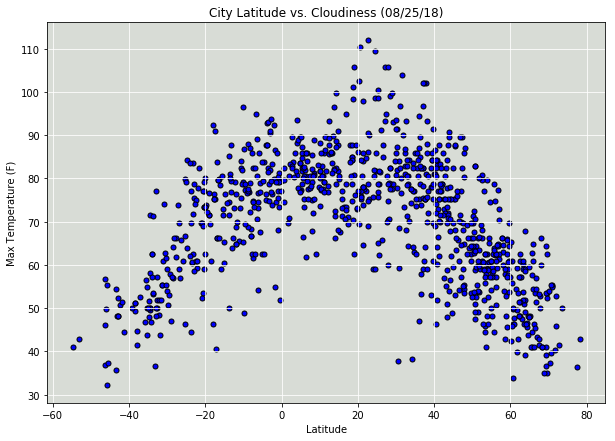

In [9]:
#Latitude vs Temperature Plot
title_text = "City Latitude vs. Max Temperature ({})".format(reportingDate)
xlabel_text="Latitude"
x_axis_column='Lat'
ylabel_text = "Max Temperature (F)"
y_axis_column='Max Temp'
myPlot(title_text,xlabel_text, x_axis_column, ylabel_text, y_axis_column)
plt.savefig("City Latitude vs. Max Temperature.png")

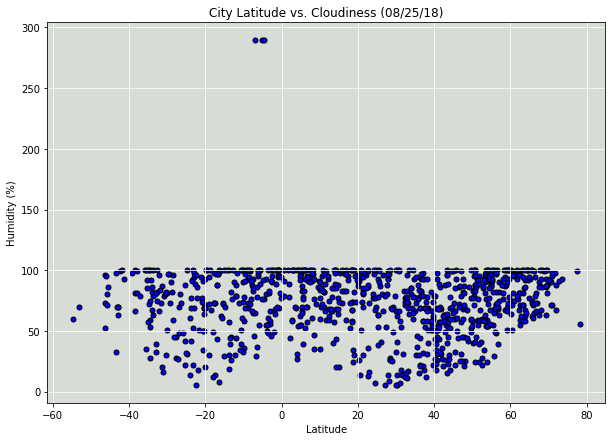

In [10]:
#Latitude vs. Humidity Plot
title_text = "City Latitude vs. Humidity ({})".format(reportingDate)
x_axis_column = 'Lat'
y_axis_column = 'Humidity'
xlabel_text = "Latitude"
ylabel_text = "Humidity (%)"
myPlot(title_text,xlabel_text, x_axis_column, ylabel_text, y_axis_column)
plt.savefig("City Latitude vs. Humidity.png")

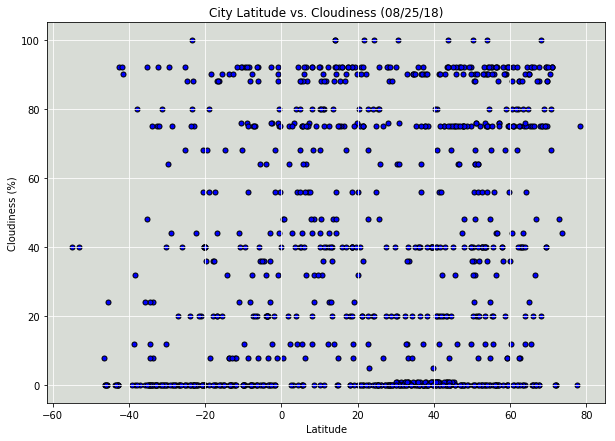

In [11]:
#Latitude vs. Cloudiness Plot
title_text = "City Latitude vs. Cloudiness ({})".format(reportingDate)
xlabel_text="Latitude"
x_axis_column='Lat'
ylabel_text = "Cloudiness (%)"
y_axis_column='Cloudiness'
myPlot(title_text,xlabel_text, x_axis_column, ylabel_text, y_axis_column)
plt.savefig("City Latitude vs. Cloudiness.png")

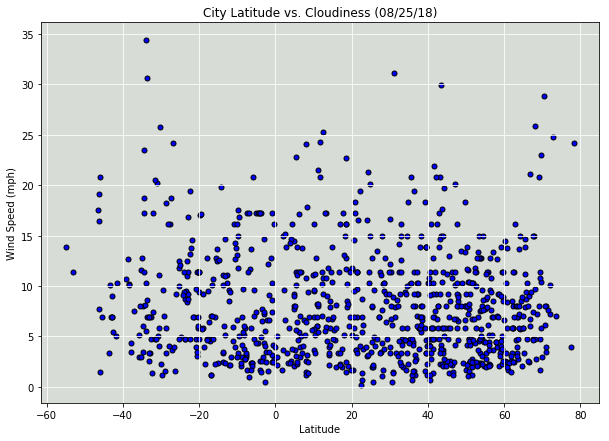

In [12]:
#Latitude vs. Wind Speed Plot
title_text = "City Latitude vs. Wind Speed".format(reportingDate)
xlabel_text="Latitude"
x_axis_column='Lat'
ylabel_text = "Wind Speed (mph)"
y_axis_column= 'Weend Speed'
myPlot(title_text,xlabel_text, x_axis_column, ylabel_text, y_axis_column)
plt.savefig("City Latitude vs. Wind Speed.png")